In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import naive_bayes
from sklearn import gaussian_process
from sklearn import discriminant_analysis
from sklearn import model_selection
from sklearn import feature_selection
from xgboost import XGBClassifier
    
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

# Hypertunning libraries
import keras_tuner as kt
from sklearn.model_selection import StratifiedKFold, KFold

2021-12-13 12:29:16.709494: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-13 12:29:16.709528: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from lib.pandas_utils import *
from lib.evaluation import *
from lib.insight import describeDataset
from lib.stats import correlation_heatmap
from lib.tuning import *

In [26]:
PATH_DATA = '/home/magody/programming/python/ibm_marathona/data/titanic/'
dataset = pd.read_csv(PATH_DATA+'train.csv')
X_submission = pd.read_csv(PATH_DATA+'test.csv')

# Data understanding

In [6]:
print(dataset.columns.values)
dataset.info()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
describeDataset(dataset)

         PassengerId    Survived      Pclass         Age       SibSp  \
count     891.000000  891.000000  891.000000  714.000000  891.000000   
mean      446.000000    0.383838    2.308642   29.699118    0.523008   
std       257.353842    0.486592    0.836071   14.526497    1.102743   
min         1.000000    0.000000    1.000000    0.420000    0.000000   
25%       223.500000    0.000000    2.000000   20.125000    0.000000   
50%       446.000000    0.000000    3.000000   28.000000    0.000000   
75%       668.500000    1.000000    3.000000   38.000000    1.000000   
max       891.000000    1.000000    3.000000   80.000000    8.000000   
missing     0.000000    0.000000    0.000000   19.865320    0.000000   

              Parch        Fare  
count    891.000000  891.000000  
mean       0.381594   32.204208  
std        0.806057   49.693429  
min        0.000000    0.000000  
25%        0.000000    7.910400  
50%        0.000000   14.454200  
75%        0.000000   31.000000  
max    

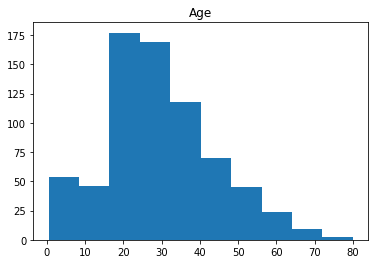

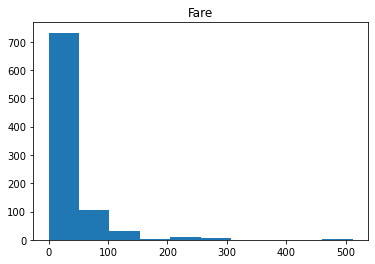

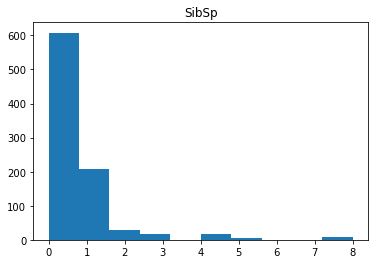

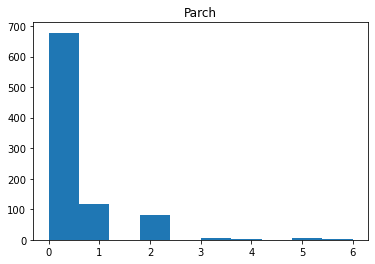

In [5]:
# Distributions
columns_numerical = ["Age", "Fare", "SibSp", "Parch"]

for column in columns_numerical:
    plt.hist(dataset[column])
    plt.title(column)
    plt.show()

/home/magody/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


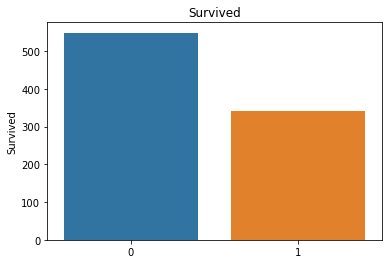

/home/magody/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


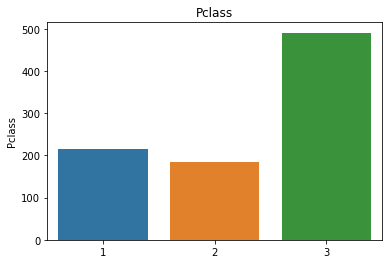

/home/magody/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


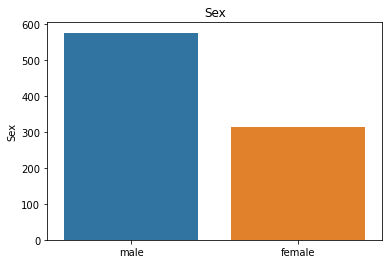

/home/magody/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


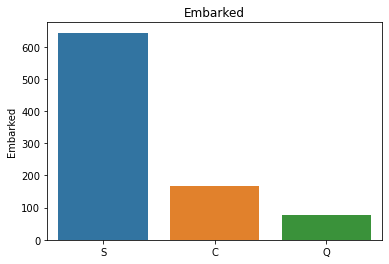

/home/magody/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


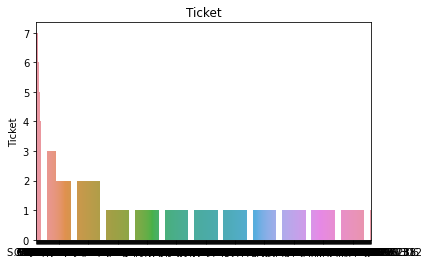

/home/magody/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


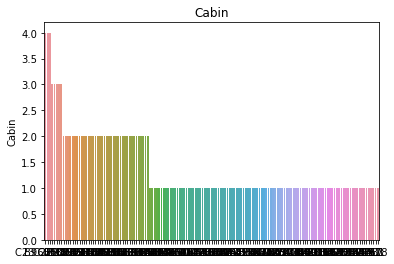

In [8]:
# categorical
columns_categorical = ['Survived','Pclass','Sex','Embarked','Ticket','Cabin']

for column in columns_categorical:
    sns.barplot(dataset[column].value_counts().index, dataset[column].value_counts()).set_title(column)
    plt.show()

In [ ]:
describeDataset(X_submission)

# EDA

## Pivoting

### Numerical
Continuous: Age, Fare
<br>
Discrete: SibSp, Parch


In [4]:
# pivot by mean
pd.pivot_table(dataset, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


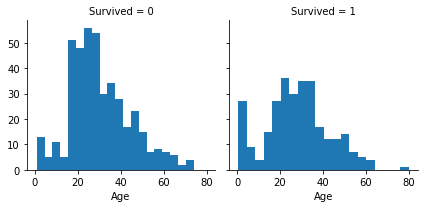

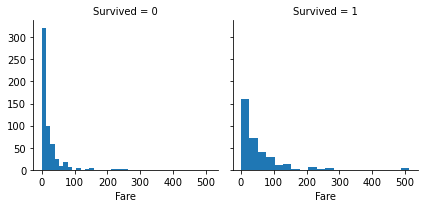

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


In [38]:
g = sns.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()
g.map(plt.hist, 'Fare', bins=20)
plt.show()

print(dataset[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values('Survived', ascending=False))
print(dataset[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values('Survived', ascending=False))


In [42]:
family = pd.DataFrame(data={
    'Family': dataset['SibSp'] + dataset['Parch'],
    'Survived': dataset['Survived']
})

print(family[['Family', 'Survived']].groupby('Family', as_index=False).mean().sort_values('Survived', ascending=False))


   Family  Survived
3       3  0.724138
2       2  0.578431
1       1  0.552795
6       6  0.333333
0       0  0.303538
4       4  0.200000
5       5  0.136364
7       7  0.000000
8      10  0.000000


### Categorical
Categorical: Survived, Sex, Embarked
<br>
Ordinal: Pclass

In [40]:
features_categorical = ['Sex', 'Embarked']
features_ordinal = ['Pclass']

for c in features_categorical:
    print(dataset[[c, 'Survived']].groupby(c, as_index=False).mean().sort_values('Survived', ascending=False))
for o in features_ordinal:
    print(dataset[[o, 'Survived']].groupby(o, as_index=False).mean().sort_values('Survived', ascending=False))


      Sex  Survived
0  female  0.742038
1    male  0.188908
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


/home/magody/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


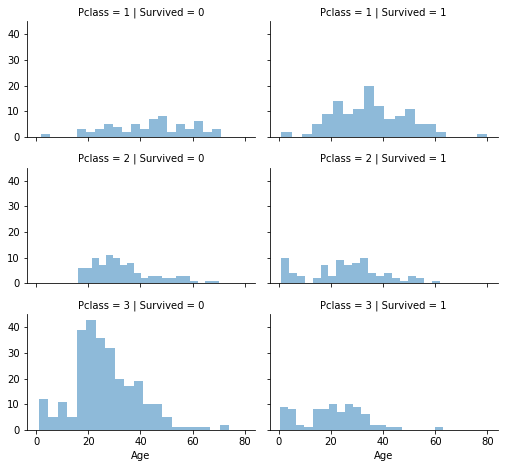

In [44]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(dataset, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

/home/magody/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/magody/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/magody/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


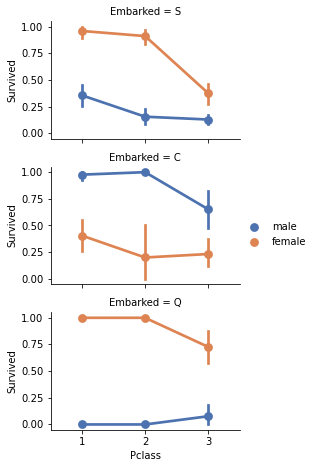

In [45]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(dataset, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/home/magody/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/magody/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


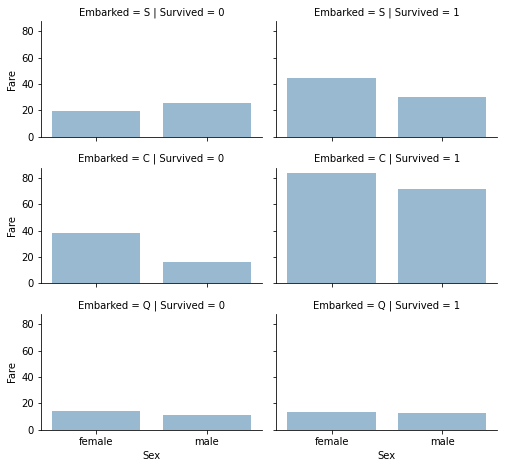

In [46]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(dataset, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Correlation

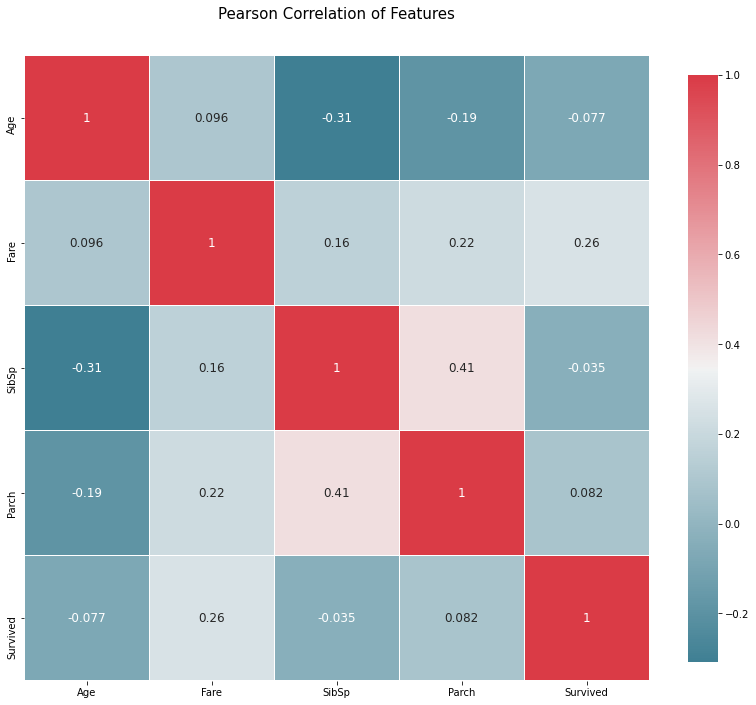

In [7]:
cols_correlation_num = columns_numerical
cols_correlation_num.append("Survived")
correlation_heatmap(dataset.loc[:, cols_correlation_num])

## Feature Engineering

1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)
<br>
2) Tickets - Do different ticket types impact survival rates?
<br>
3) Does a person's title relate to survival rates? 

In [10]:
dataset['cabin_multiple'] = dataset.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 
dataset['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [15]:
pd.pivot_table(dataset, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [17]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category

dataset['cabin_adv'] = dataset.Cabin.apply(lambda x: str(x)[0])
#comparing surivial rate by cabin
print(dataset.cabin_adv.value_counts())
pd.pivot_table(dataset,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [18]:
#understand ticket values better 
#numeric vs non numeric 
dataset['numeric_ticket'] = dataset.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
dataset['ticket_letters'] = dataset.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
dataset['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [20]:
#lets us view all rows in dataframe through scrolling. This is for convenience 
pd.set_option("max_rows", None)
dataset['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
pp             3
sopp           3
wep            3
ppp            2
sotono2        2
scah           2
swpp           2
sc             1
sop            1
fc             1
sca4           1
fa             1
as             1
sp             1
scow           1
scahbasle      1
casoton        1
Name: ticket_letters, dtype: int64

In [22]:
#difference in numeric vs non-numeric tickets in survival rate 
pd.pivot_table(dataset,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [23]:
#survival rate across different tyicket types 
pd.pivot_table(dataset,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [24]:
#feature engineering on person's title 
dataset.Name.head(50)
dataset['name_title'] = dataset.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
#mr., ms., master. etc
dataset['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Sir               1
Don               1
Capt              1
Jonkheer          1
Lady              1
Mme               1
Ms                1
the Countess      1
Name: name_title, dtype: int64

In [73]:
# Age bands
bins = [0, 4, 16, 28, 40, 64, np.inf]
labels = [i for i in range(len(bins)-1)]
dataset['AgeBand'] = pd.cut(dataset['Age'], bins=bins, labels=labels)
print(dataset[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True))

dataset = dataset.drop('AgeBand', axis=1)

  AgeBand  Survived
0       0  0.675000
1       1  0.466667
2       2  0.354962
3       3  0.430693
4       4  0.388489
5       5  0.090909


In [ ]:
# cleaned['IsAlone'] = 0
# cleaned.loc[cleaned['FamilySize'] == 1, 'IsAlone'] = 1
# X[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

In [94]:
# Fare bands
bins = [0, 12, 100, 300, np.inf]
labels = [i for i in range(len(bins)-1)]
dataset['FareBand'] = pd.cut(dataset['Fare'], bins=bins, labels=labels)
print(dataset[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True))

dataset = dataset.drop('FareBand', axis=1)

  FareBand  Survived
0        0  0.225627
1        1  0.476293
2        2  0.720000
3        3  1.000000


In [147]:
dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

print(pd.crosstab(dataset['Title'], dataset['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [148]:
dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
dataset = dataset.drop('Title', axis=1)

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


# Model Data: Cleaning and preparation

In [80]:
from sklearn.preprocessing import StandardScaler

class PipelineTitanic:
    
    def __init__(self) -> None:
        self.mask_importances = []
    
    def transform(self, X, y=None, is_training=True):
        
        cleaned = X.copy()
        
        # CORRECTING/Transforming
        
        cleaned = cleaned.drop(['PassengerId'], axis=1)
        cleaned = custom_replace(cleaned, 'Embarked', 'mode', [np.nan])
        cleaned['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
       
        cleaned = cleaned.astype({'Sex': 'uint8', 'Pclass': 'int64'})
        
        
        
        ## For age use median but bassed on other categories, this is due to higher missing values
        ## we should be more accurate using inputer method
        guess_ages = np.zeros((2,3))
        for i in range(0, 2):
            for j in range(0, 3):
                guess_df = cleaned[(cleaned['Sex'] == i) & \
                                    (cleaned['Pclass'] == j+1)]['Age'].dropna()

                # age_mean = guess_df.mean()
                # age_std = guess_df.std()
                # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

                age_guess = guess_df.median()

                # Convert random age float to nearest .5 age
                guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
                
        for i in range(0, 2):
            for j in range(0, 3):
                cleaned.loc[ (cleaned.Age.isna()) & (cleaned.Sex == i) & (cleaned.Pclass == j+1),\
                        'Age'] = guess_ages[i,j]
        
        
        ## Due to missing Fare data is not higher than 1% using direct mean will not affect a lot
        cleaned = custom_replace(cleaned, 'Fare', 'median', [np.nan])
        
        
        # CREATING
        
        ## Create bands
        ### Age bands
        bins = [0, 4, 16, 28, 40, 64, np.inf]
        labels = [i for i in range(len(bins)-1)]
        cleaned['Age'] = pd.cut(cleaned['Age'], bins=bins, labels=labels)
        ### Fare bands
        bins = [-1, 12, 100, 300, np.inf]
        labels = [i for i in range(len(bins)-1)]
        cleaned['Fare'] = pd.cut(cleaned['Fare'], bins=bins, labels=labels)
        
        cleaned['Title'] = cleaned.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
        cleaned['Title'] = cleaned['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
            'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

        cleaned['Title'] = cleaned['Title'].replace('Mlle', 'Miss')
        cleaned['Title'] = cleaned['Title'].replace('Ms', 'Miss')
        cleaned['Title'] = cleaned['Title'].replace('Mme', 'Mrs')
        cleaned = cleaned.drop(['Name'], axis=1)
        
        """
        cleaned.loc[cleaned['Cabin'].notna(), 'Cabin'] = 1
        cleaned.loc[cleaned['Cabin'].isna(), 'Cabin'] = 0
        """
        
        
        cleaned['cabin_multiple'] = cleaned["Cabin"].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
        # cleaned['cabin_adv'] = cleaned["Cabin"].apply(lambda x: str(x)[0])
        
        cleaned = cleaned.drop('Cabin', axis=1)
        
        cleaned['numeric_ticket'] = cleaned.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
        # cleaned['ticket_letters'] = cleaned.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
        cleaned = cleaned.drop('Ticket', axis=1)

                
        
        # CONVERTING: categorical and types
        cleaned['FamilySize'] = cleaned['SibSp'] + cleaned['Parch'] + 1
        cleaned['IsAlone'] = 0
        cleaned.loc[cleaned['FamilySize'] == 1, 'IsAlone'] = 1
        # cleaned = cleaned.drop(['Parch', 'SibSp'], axis=1)
        
        cleaned = cleaned.astype({'Fare': 'int64', 'Age': 'int64', 'IsAlone': 'uint8'})
        
        cleaned['Age*Pclass'] = cleaned['Age'] * cleaned['Pclass']
    

        cleaned = one_hot_encoding(cleaned, 'Embarked')
        # cleaned = one_hot_encoding(cleaned, 'cabin_adv')
        # cleaned = one_hot_encoding(cleaned, 'ticket_letters')
        # cleaned = one_hot_encoding(cleaned, 'Age')
        # cleaned = one_hot_encoding(cleaned, 'FamilySize')
        cleaned = one_hot_encoding(cleaned, 'Pclass')
        cleaned = one_hot_encoding(cleaned, 'Fare')
        cleaned = one_hot_encoding(cleaned, 'Title')
        
        scale = StandardScaler()
        
        to_scale = ['cabin_multiple', 'Age','SibSp','Parch','FamilySize','Age*Pclass']
        
        cleaned[to_scale]= scale.fit_transform(cleaned[to_scale])
        
        
        # Pclass 1 < 3 in reality too, so keep relationship
        
        if is_training:
            # Feature selection
            #tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
            param_grid_dt = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
                        #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
                        'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
                        #'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
                        #'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
                        #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
                        'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
                        }
            
            cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
            model_dt = tuneModel('model_dt', cleaned, y, tree.DecisionTreeClassifier(), param_grid_dt, cv_split)

            #feature selection
            dtree_rfe = feature_selection.RFECV(model_dt, min_features_to_select=12, step = 1, scoring = 'accuracy', cv = cv_split)
            dtree_rfe.fit(cleaned, y)
            mask_importance = dtree_rfe.get_support()
            self.mask_importance = mask_importance
        
        
        # print(cleaned.columns)
        return cleaned.loc[:, self.mask_importance]

pipeline = PipelineTitanic()
X = pipeline.transform(dataset.drop('Survived', axis=1), dataset['Survived'])
y = dataset['Survived']
print(len(pipeline.mask_importance), pipeline.mask_importance)
X.info()
z = X.copy()
z['Survived'] = y
# correlation_heatmap(z,figsize=(32, 24))
del z
# Consider shuffling
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, shuffle=True)
# del X, y
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))
X_check = pipeline.transform(X_submission, y=None, is_training=False)
del X_check

model_dt Before: TestScore=78.80597014925374
model_dt After tunning: TestScore= 85.05720390054437 

24 [False False False False  True False  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cabin_multiple  891 non-null    float64
 1   FamilySize      891 non-null    float64
 2   IsAlone         891 non-null    uint8  
 3   Age*Pclass      891 non-null    float64
 4   Embarked_C      891 non-null    uint8  
 5   Embarked_Q      891 non-null    uint8  
 6   Pclass_1        891 non-null    uint8  
 7   Pclass_2        891 non-null    uint8  
 8   Pclass_3        891 non-null    uint8  
 9   Fare_0          891 non-null    uint8  
 10  Fare_1          891 non-null    uint8  
 11  Fare_2          891 non-null    uint8  
 12  Fare_3    

/home/magody/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


# Model building

## Neural Network

### Exploring configuration

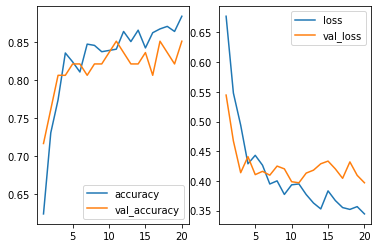

<Figure size 432x288 with 0 Axes>

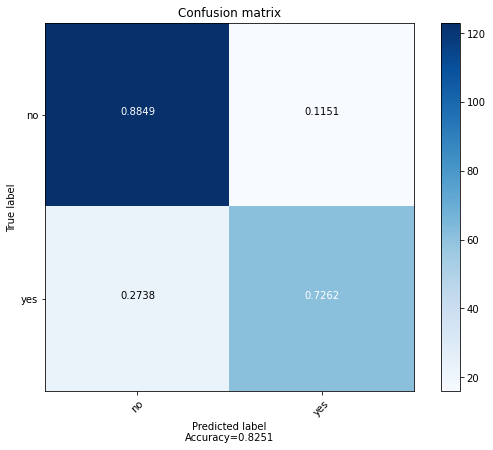

              precision    recall  f1-score   support

          no       0.84      0.88      0.86       139
         yes       0.79      0.73      0.76        84

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223



In [50]:
# Explorate the neural network
# input_shape = (len(X_train[0]),)

model = Sequential(
    layers=[
        Dense(32, kernel_initializer='he_normal', activation="relu"),
        Dropout(0.3),
        Dense(16, kernel_initializer='he_normal', activation="relu"),
        Dropout(0.2),
        Dense(1, activation="sigmoid")
    ]
)
adam = Adam(learning_rate=0.01)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])

EPOCHS = 20

h = model.fit(
    X_train, 
    y_train.reshape((len(y_train), 1)),
    epochs=EPOCHS,
    batch_size=64,
    validation_split=0.1,
    verbose=0
)
history = h.history

evaluateClassificationNeuralNetwork(history, model, X_test, y_test)


### Hyperparameter tuning

In [81]:
global input_shape
input_shape = (len(X_train[0]),)

EPOCHS=30
BATCH_SIZE=64
TRIALS=20

def build_model(hp):
    global input_shape
    model = Sequential()
    model.add(
        Dense(hp.Int('units', min_value=6, max_value=64, step=2), 
              kernel_initializer='he_normal', activation="relu", input_shape=input_shape)
    )
    model.add(Dropout(hp.Float('dropout1', min_value=0.1, max_value=0.5)))
    
    model.add(
        Dense(hp.Int('units2', min_value=2, max_value=64, step=2), 
            kernel_initializer='he_normal', activation="relu")
    )
    model.add(Dropout(hp.Float('dropout2', min_value=0, max_value=0.3)))
        
    
    model.add(Dense(1, activation="sigmoid"))

    adam = Adam(learning_rate=hp.Float('learning_rate', min_value=0.0001, max_value=0.01))

    model.compile(
        loss="binary_crossentropy",
        optimizer=adam, 
        metrics=['accuracy', backend_f1_score])
    return model

tuner = kt.RandomSearch(
    build_model,
    # objective='val_backend_f1_score',
    objective=kt.Objective("val_accuracy", direction="max"),
    max_trials=TRIALS,
    overwrite=True
)


tuner.search(
    X_train, 
    y_train.reshape((len(y_train), 1)),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=0
)

best_hp = tuner.get_best_hyperparameters()[0]
print("best_hp", best_hp.get_config())


INFO:tensorflow:Oracle triggered exit
best_hp {'space': [{'class_name': 'Int', 'config': {'name': 'units', 'default': None, 'conditions': [], 'min_value': 6, 'max_value': 64, 'step': 2, 'sampling': None}}, {'class_name': 'Float', 'config': {'name': 'dropout1', 'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': None}}, {'class_name': 'Int', 'config': {'name': 'units2', 'default': None, 'conditions': [], 'min_value': 2, 'max_value': 64, 'step': 2, 'sampling': None}}, {'class_name': 'Float', 'config': {'name': 'dropout2', 'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.3, 'step': None, 'sampling': None}}, {'class_name': 'Float', 'config': {'name': 'learning_rate', 'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': None}}], 'values': {'units': 34, 'dropout1': 0.1549485371008419, 'units2': 28, 'dropout2': 0.25871851729758905, 'learning_rate': 0.007672658285016199}}


In [82]:
best_hp = tuner.get_best_hyperparameters()[0]
best_model_vanilla = tuner.get_best_models(1)[0]
print(best_model_vanilla.evaluate(X_test, y_test))

7/7 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8161 - backend_f1_score: 0.7441
[0.418485164642334, 0.8161435127258301, 0.7441125512123108]


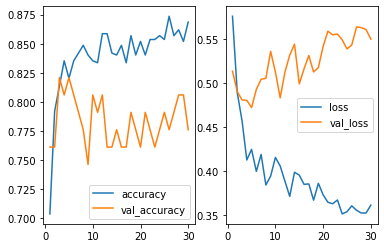

<Figure size 432x288 with 0 Axes>

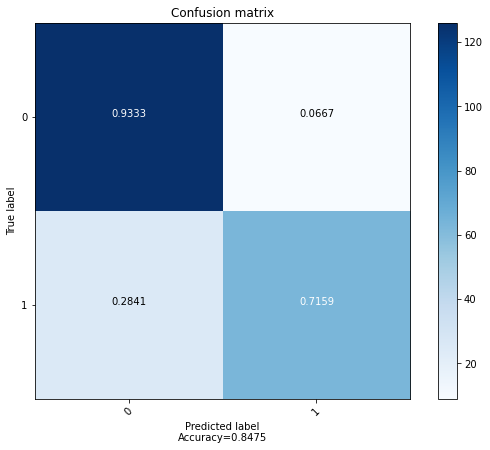

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       135
           1       0.88      0.72      0.79        88

    accuracy                           0.85       223
   macro avg       0.85      0.82      0.83       223
weighted avg       0.85      0.85      0.84       223



In [83]:
best_hp = tuner.get_best_hyperparameters()[0]
best_model = build_model(best_hp)

h = best_model.fit(X_train, y_train, batch_size=BATCH_SIZE, verbose=0, epochs=EPOCHS, validation_split=0.1)
  
evaluateClassificationNeuralNetwork(h.history, best_model, X_test, y_test, target_names=["0", "1"], metrics=["accuracy", "loss"])

3/3 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7978 - backend_f1_score: 0.7376


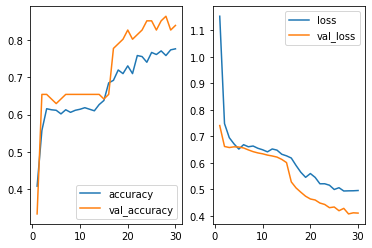

<Figure size 432x288 with 0 Axes>

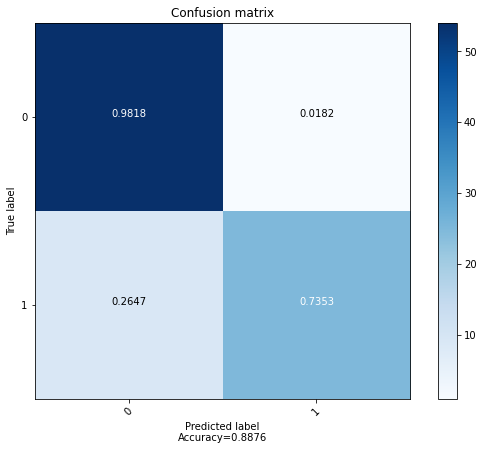

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        55
           1       0.96      0.74      0.83        34

    accuracy                           0.89        89
   macro avg       0.91      0.86      0.87        89
weighted avg       0.90      0.89      0.88        89



In [76]:
skfold = StratifiedKFold(n_splits=10, shuffle=True)

best_score = -1
model_nn = None
history = None

# The general X_test and X_train will be selected here?

for index_train, index_test in skfold.split(X, y):
    split_model = build_model(best_hp)

    split_X_train = X[index_train]
    split_y_train = y[index_train]
    split_X_test = X[index_test]
    split_y_test = y[index_test]
    
    h = split_model.fit(split_X_train, split_y_train, batch_size=BATCH_SIZE, verbose=0, epochs=EPOCHS, validation_split=0.1)
    evaluation = split_model.evaluate(split_X_test, split_y_test)
    acc = evaluation[1]
    
    if acc > best_score:
        best_score = acc
        model_nn = split_model
        history = h.history
        X_test = split_X_test
        y_test = split_y_test
    
evaluateClassificationNeuralNetwork(history, model_nn, X_test, y_test, target_names=["0", "1"], metrics=["accuracy", "loss"])

## MLA

### Overview

In [125]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(n_neighbors=3),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier(eval_metric='mlogloss')    
]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = pd.DataFrame(data={'Label': y})

#index through MLA and save performance to table
row_index = 0
for model in MLA:

    #set name and parameters
    MLA_name = model.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(model.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(model, X, y, cv  = cv_split)
    # print(cv_results)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    model.fit(X, y)
    MLA_predict[MLA_name] = model.predict(X)
    
    row_index+=1


MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare


,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.822388,0.0459365,0.0478195
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.822388,0.0453876,0.0402272
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.816045,0.0664232,0.0729298
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.815299,0.0668369,0.126515
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.811194,0.0725801,0.239411
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.811194,0.0617602,0.0694392
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.809328,0.0491646,0.477136
19,LinearDiscriminantAnalysis,"{'covariance_estimator': None, 'n_components':...",0.807463,0.0434121,0.00148909
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.80709,0.0447901,0.00285275
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.806343,0.057396,0.152805


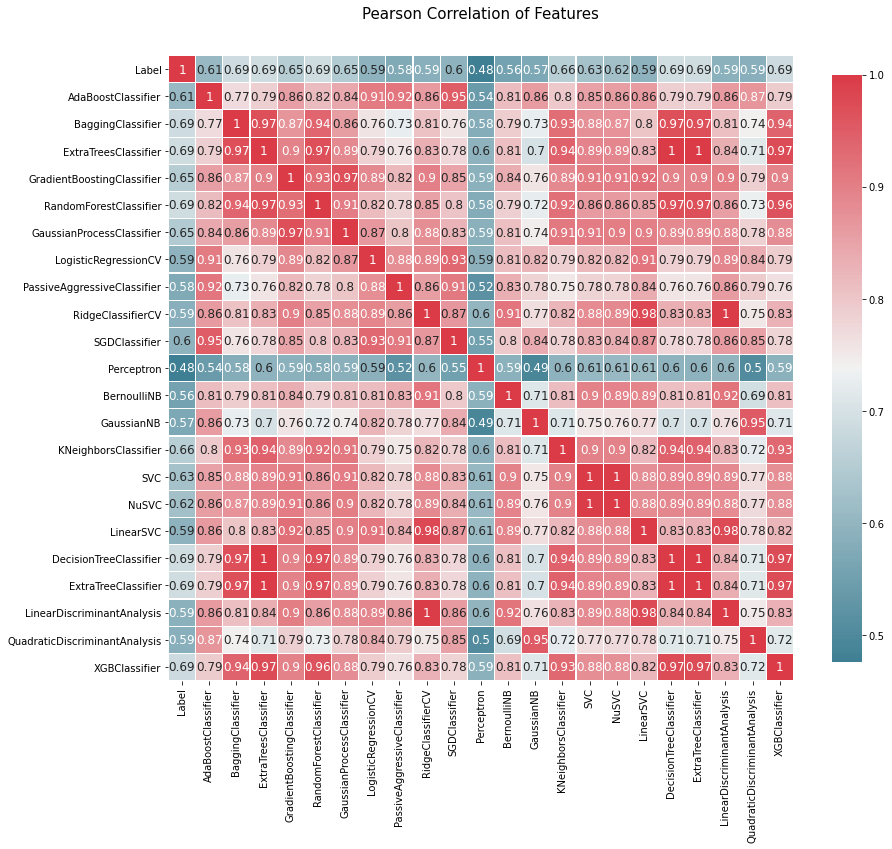

In [126]:
correlation_heatmap(MLA_predict)

### Tuning selected MLA models

In [127]:
#tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid_dt = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              #'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              #'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

model_dt = tuneModel('model_dt', X, y, tree.DecisionTreeClassifier(), param_grid_dt, cv_split)

param_grid_gd = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }
model_gb = tuneModel('model_gb', X, y, ensemble.GradientBoostingClassifier(), param_grid_gd, cv_split)

param_grid_rf = {"n_estimators" : range(100,1000,100)}
model_rf = tuneModel('model_rf', X, y, ensemble.RandomForestClassifier(), param_grid_rf, cv_split)

param_grid_svc = {'kernel': ['rbf','linear'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
model_svc = tuneModel('model_svc', X, y, svm.SVC(probability=True), param_grid_svc, cv_split)

param_grid_logistic = {}
model_logistic = tuneModel('model_logistic', X, y, linear_model.LogisticRegressionCV(), param_grid_logistic, cv_split)


model_dt Before: TestScore=80.22388059701493
model_dt After tunning: TestScore= 85.64255125697701 

model_gb Before: TestScore=81.1194029850746
model_gb After tunning: TestScore= 84.31953369312474 

model_rf Before: TestScore=80.7089552238806
model_rf After tunning: TestScore= 85.25472026443663 

model_svc Before: TestScore=82.23880597014924
model_svc After tunning: TestScore= 86.41224500664163 

model_logistic Before: TestScore=81.11940298507463
model_logistic After tunning: TestScore= 85.953697177978 



# Deployment and ensembles

In [130]:
# why choose one model, when you can pick them all with voting classifier
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
#removed models w/o attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model
vote_est = [
    ('gd', model_gb),
    ('lr', model_logistic),
    ('svc', model_svc),
    ('dt', model_dt),
    ('rf', model_rf),
]


#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X, y, cv  = cv_split)
vote_hard.fit(X, y)
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))

#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X, y, cv  = cv_split)
vote_soft.fit(X, y)
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))


Hard Voting Test w/bin score mean: 81.42
Soft Voting Test w/bin score mean: 82.43


In [62]:
def exportSolutions(model_for_results, filename='submission.csv'):
    X_submission_clean = pipeline.transform(X_submission, is_training=False)
    y_pred = model_for_results.predict(X_submission_clean).reshape((1,len(X_submission_clean)))[0]
    result = pd.DataFrame(data={
        'PassengerId': X_submission['PassengerId'],
        'Survived': list(map(lambda x: 1 if x > 0.5 else 0, y_pred))
    })
    result.to_csv(filename, index=False)

In [138]:
exportSolutions(vote_soft, 'vote_soft.csv')  # 0.77272
exportSolutions(model_dt, 'model_dt.csv')  # 0.77990
exportSolutions(model_svc, 'model_svc.csv')  # 0.77511
exportSolutions(model_gb, 'model_gb.csv')  # 0.76555
exportSolutions(model_logistic, 'model_logistic.csv')  # 0.76076
exportSolutions(model_rf, 'model_rf.csv')  # 0.75598

In [144]:
# with hard, soft and nn
# Result: 0.77272

X_submission_clean = pipeline.transform(X_submission, is_training=False)
y_pred = (vote_soft.predict(X_submission_clean) + vote_hard.predict(X_submission_clean) + model_nn.predict(X_submission_clean).reshape((1,len(X_submission_clean)))[0])/3

result = pd.DataFrame(data={
    'PassengerId': X_submission['PassengerId'],
    'Survived': list(map(lambda x: 1 if x > 0.5 else 0, y_pred))
})
result.to_csv('model_fusion.csv', index=False)
    
    

In [65]:
len(pipeline.mask_importance)

31

In [77]:
exportSolutions(model_nn, 'model_nn3.csv')  # 0.77033 0.77272 0.77272

Index(['Sex', 'Age', 'cabin_multiple', 'numeric_ticket', 'FamilySize',
       'IsAlone', 'Age*Pclass', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Fare_0', 'Fare_1', 'Fare_2',
       'Fare_3', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare'],
      dtype='object')


In [168]:
exportSolutions(best_model_vanilla, 'best_model_vanilla.csv')

In [84]:
exportSolutions(best_model, 'best_model_retrain.csv') # 0.78708 0.78468 without k fold
# this is best result, even if the kfold have more accuracy in THIS test data
# standardization reduces
